<a href="https://colab.research.google.com/github/raihanhd12/PCVK_Genap_2023/blob/main/Minggu%205/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tugas Praktikum**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

### 1. Buat Gamma Correction



> Rumus **I' = 255 * (I/255)^(1/gamma)**



 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


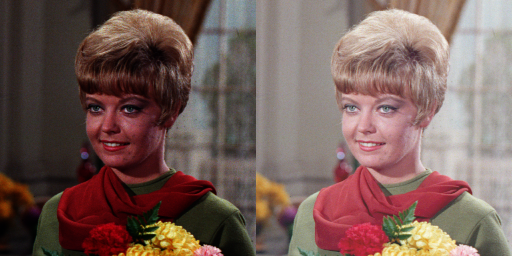

In [ ]:
original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/female.tiff')

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

# # Melakukan operasi Gamma Correction dengan menggunakan rumus I^gamma = 255 * (I/255)^(1/gamma).
# gamma_corrected = 255 * (original / 255) ** (1/gamma)

# # Mengonversi hasil Gamma Correction menjadi tipe data unsigned integer 8-bit agar dapat ditampilkan oleh OpenCV.
# gamma_corrected = np.uint8(gamma_corrected)

# Membuat array kosong dengan ukuran dan tipe data yang sama dengan citra asli.
gamma_corrected = np.zeros(original.shape, original.dtype)

# Looping pada setiap baris citra asli.
for y in range(original.shape[0]):
  # Looping pada setiap kolom citra asli.
  for x in range(original.shape[1]):
    # Looping pada setiap channel citra asli 
    for c in range(original.shape[2]):
     # Menghitung nilai gamma correction untuk setiap piksel di setiap channel,
     # lalu nilai tersebut dipotong (clipped) antara 0 dan 255. Hasilnya disimpan pada array gamma_corrected.
     gamma_corrected[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_corrected))
cv2_imshow(final_frame)

### 2. Buat Simulasi Image Depth

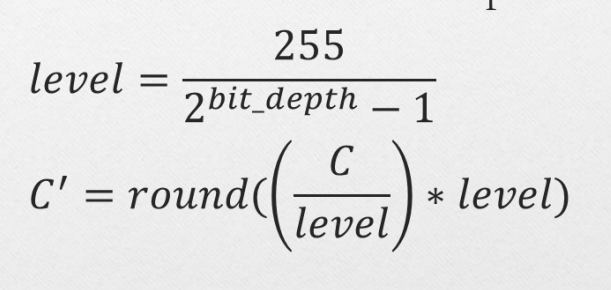

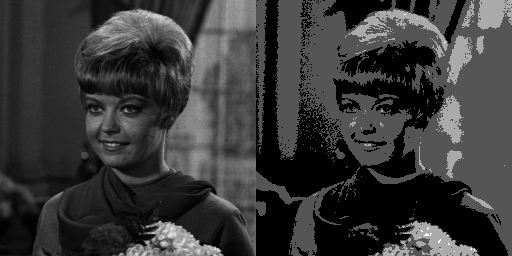

In [ ]:
# membaca citra dengan format tiff dari direktori yang telah ditentukan dan menyimpannya ke dalam variabel
img_rgb = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/female.tiff')

# Mengubah citra dari mode warna ke greyscale menggunakan
# fungsi cv.cvtColor() dengan argumen citra awal img_rgb dan mode warna konversi cv.COLOR_BGR2GRAY.
original = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

# Membuat array numpy dengan ukuran dan tipe data yang sama dengan citra awal menggunakan fungsi np.zeros().
# Array ini nantinya akan diisi dengan nilai pixel hasil kuantisasi citra.
bitdepth_image = np.zeros(original.shape, original.dtype)

# Menentukan nilai bit kedalaman citra yang diinginkan, dalam kasus ini 2 bit.
bit = 2

# Menghitung nilai level kuantisasi dengan menggunakan formula level = (jumlah level - 1) / rentang nilai piksel ,
# dalam level ini jumlah levelnya adalah 2^2 (2 bit) dan rentang nilai piksel adalah 0-255 (8 bit).
level = 255 / (pow(2,bit)-1) 

# Melakukan looping untuk setiap baris pada citra grayscale.
for y in range(original.shape[0]):
  # Melakukan looping untuk setiap kolom pada citra grayscale.
  for x in range(original.shape[1]):
    # Pertama, nilai intensitas piksel pada citra grayscale dibagi dengan rentang nilai warna yang sudah ditentukan (level).
    # Hasil pembagian dibulatkan ke nilai terdekat dan dikalikan kembali dengan rentang nilai warna (level).
    # Kemudian, nilai hasil perhitungan tersebut dibatasi dalam rentang 0 sampai 255 agar sesuai dengan tipe data citra.
    bitdepth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255);

final_frame = cv.hconcat((original, bitdepth_image))
cv2_imshow(final_frame)

### 3. Buat modul Average Denoising 



Jumlah citra yang di-averaging: 5




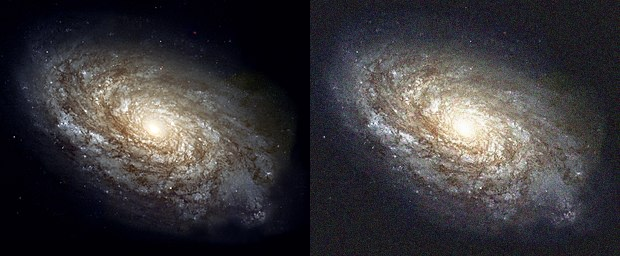



Nilai PSNR adalah 27.529561116310948 (dB)
___________________________________________________________________


Jumlah citra yang di-averaging: 30




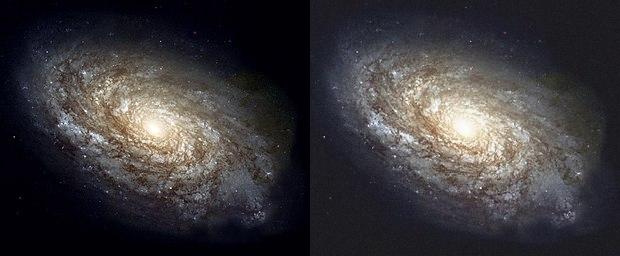



Nilai PSNR adalah 27.509719987043574 (dB)
___________________________________________________________________


Jumlah citra yang di-averaging: 60




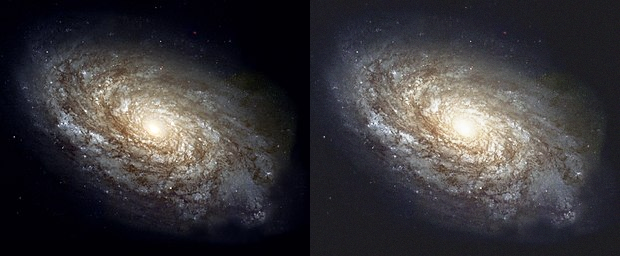



Nilai PSNR adalah 27.49252397268796 (dB)
___________________________________________________________________


Jumlah citra yang di-averaging: 80




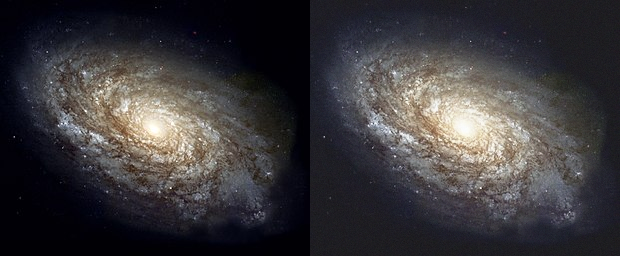



Nilai PSNR adalah 27.510604689759532 (dB)
___________________________________________________________________


Jumlah citra yang di-averaging: 100




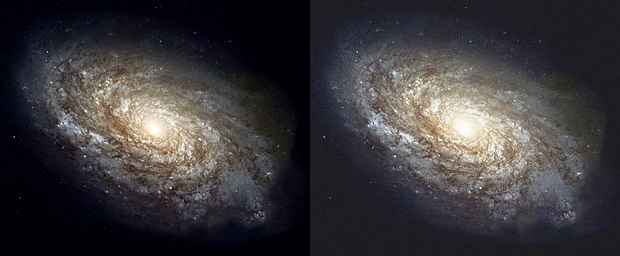



Nilai PSNR adalah 27.510938377802702 (dB)
___________________________________________________________________


In [ ]:
# library untuk melakukan pencarian file dengan pola tertentu.
import glob

# mengimport logaritma basis 10 dan akar kuadrat dari library math.
from math import log10, sqrt

# mendefinisikan sebuah fungsi average_images yang membutuhkan parameter num_images.
def average_images(num_images):

    #  membaca gambar asli dengan menggunakan OpenCV dan menyimpannya ke dalam variabel original.
    original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/galaxy.jpg')

    # membuat sebuah list kosong untuk menyimpan gambar-gambar yang akan di-averaging.
    cv_img = []

    # melakukan iterasi pada setiap file gambar dengan ekstensi .jpg yang berada di dalam folder.
    # Kemudian, setiap gambar akan dimasukkan ke dalam list cv_img.
    for img in sorted(glob.glob('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/noises/*.jpg')):
        n = cv.imread(img) # digunakan untuk membaca gambar noisy dari direktori yang sudah dipilih.
        cv_img.append(n)

    # Perform averaging
    dst = cv_img[0]
    for i in range(1, num_images):
      # menghitung nilai alpha yang akan digunakan untuk melakukan averaging.
      # Nilai alpha akan dihitung berdasarkan urutan gambar yang di-averaging.
        alpha = 1.0 / (i + 1)

        # menghitung nilai beta yang akan digunakan untuk melakukan averaging.
        beta = 1.0 - alpha

        # melakukan averaging pada gambar-gambar yang telah dimasukkan ke dalam list cv_img
        # menggunakan nilai alpha dan beta yang telah dihitung. Hasil averaging akan disimpan ke dalam variabel dst.
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

    # mengubah tipe data variabel dst menjadi uint8 agar bisa ditampilkan dengan OpenCV.
    dst = dst.astype('uint8') 

    # mendefinisikan sebuah fungsi PSNR yang membutuhkan dua parameter yaitu original (gambar asli) dan compressed (gambar hasil averaging).
    def PSNR(original, compressed): 
      # menghitung nilai MSE (Mean Squared Error) antara gambar asli dan hasil averaging.
        mse = np.mean((original - compressed) ** 2) 
       
        if(mse == 0):  # jika nilai MSE adalah 0, maka nilai PSNR akan dianggap 100. 
            return 100     
        max_pixel = 255.0  # menentukan nilai maksimal piksel yang ada pada gambar (dalam hal ini, 255 karena tipe datanya adalah uint8).      
        psnr = 20 * log10(max_pixel / sqrt(mse)) # menghitung nilai PSNR berdasarkan rumus yang telah ditentukan.        
        return psnr # mengembalikan nilai PSNR.

    compressed = dst # menyimpan hasil averaging ke dalam variabel compressed.
    psnr = PSNR(original, compressed) #  menghitung nilai PSNR dengan memanggil fungsi PSNR.

    # menggabungkan gambar asli dan hasil averaging secara horizontal menggunakan OpenCV dan menyimpannya
    galaxy_frame = cv.hconcat((original, dst))    
    cv2_imshow(galaxy_frame) # menampilkan citra hasil gabungan galaxy_frame
    print('\n') # mencetak baris kosong.
    print('Nilai PSNR adalah', psnr, '(dB)') # mencetak nilai PSNR yang dihitung untuk citra hasil averaging.
    print('___________________________________________________________________')

# membuat sebuah list yang berisi angka yang merepresentasikan jumlah citra bising yang akan dihitung rata-ratanya.
num_images = [5, 30, 60, 80, 100]

#  memulai perulangan for yang mengiterasi setiap elemen dalam list num_images.
for n in num_images:   
    print('\n')
    # mencetak jumlah citra bising yang dihitung rata-ratanya pada iterasi saat ini.
    print('Jumlah citra yang di-averaging:', n)
    print('\n')
    # memanggil fungsi average_images() dengan jumlah citra bising pada iterasi saat ini.
    average_images(n)    

### 4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff)

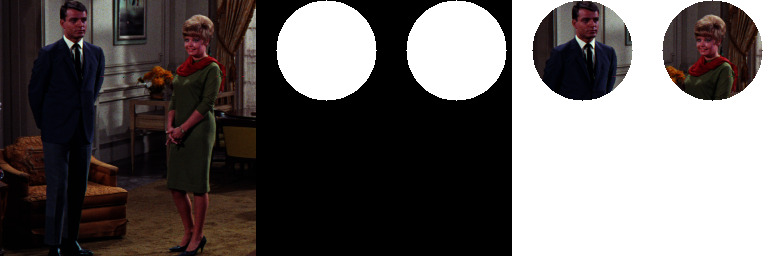

In [ ]:
# Mendefinisikan variabel original sebagai citra input yang akan diproses dengan membaca citra couple.tiff menggunakan fungsi cv.imread() dari library OpenCV.
original= cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/couple.tiff')

# Mendefinisikan variabel mask1 sebagai mask yang berupa array nol dengan dimensi yang sama dengan original, dan tipe data uint8.
mask1 = np.zeros(original.shape, dtype=np.uint8)
# membuat lingkaran pada mask mask1 dengan titik pusat pada koordinat (70, 50), radius 50, dan warna putih (255,255,255) menggunakan fungsi cv.circle().
cv.circle(mask1, (70, 50), 50, (255,255,255), -1)

# Mendefinisikan variabel mask2 sebagai mask yang berupa array nol dengan dimensi yang sama dengan original, dan tipe data uint8. 
mask2 = np.zeros(original.shape, dtype=np.uint8)
# membuat lingkaran pada mask mask2 dengan titik pusat pada koordinat (200, 50), radius 50, dan warna putih (255,255,255) menggunakan fungsi cv.circle().
cv.circle(mask2, (200, 50), 50, (255,255,255), -1)

# Mendefinisikan variabel combine_masked sebagai citra hasil dari operasi AND antara original dengan hasil penjumlahan mask mask1 dan mask2.
combine_masked = original & (mask1+mask2)

# Mendefinisikan variabel result sebagai hasil dari operasi bitwise AND antara original dengan combine_masked.
result = cv.bitwise_and(original, combine_masked)
# Menentukan bahwa semua nilai piksel pada result yang berada pada posisi combine_masked yang bernilai 0 akan diubah menjadi warna putih (255).
result[combine_masked==0] = 255 # Optional

# Menggabungkan citra original, mask mask1 dan mask2, dan citra hasil result secara horizontal menggunakan fungsi cv.hconcat()
final_frame = cv.hconcat((original, (mask1 + mask2), result))
# menampilkan hasil penggabungan citra menggunakan fungsi cv2_imshow().
cv2_imshow(final_frame)

### 5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu. 

1. Operator OR

> Operator OR atau disebut juga dengan union adalah operator logika yang menghasilkan nilai true apabila salah satu atau kedua operand memiliki nilai true.

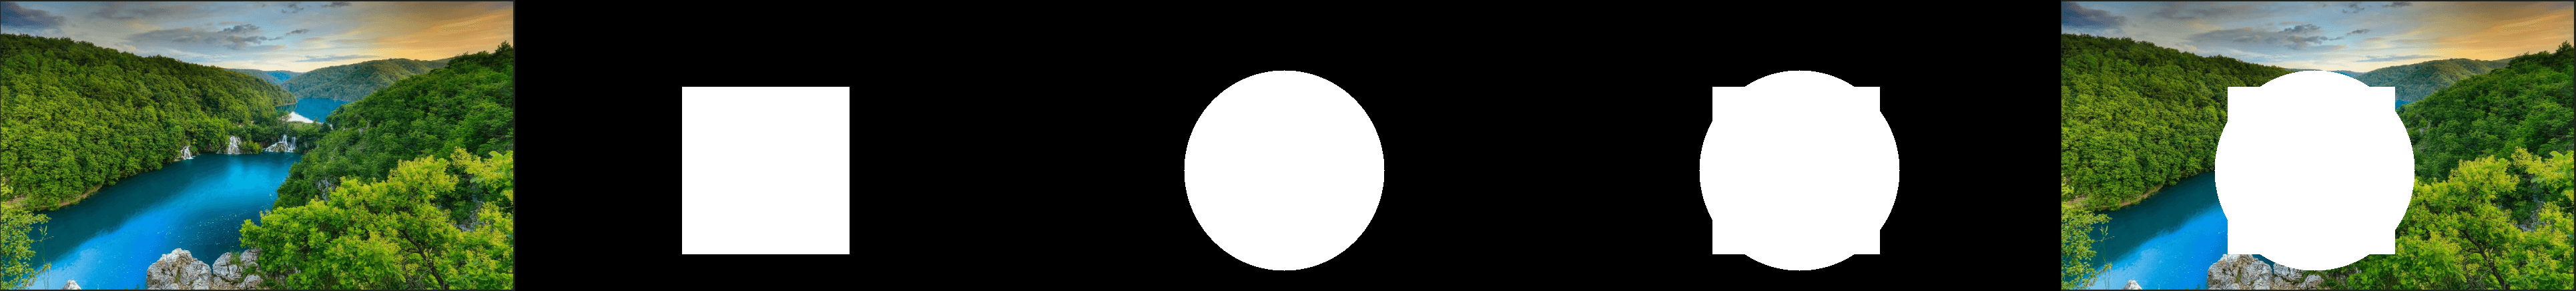

In [ ]:
original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/jungle.png')

# creating a square of zeros using a variable
mask1 = np.zeros(original.shape, dtype=np.uint8)
cv.rectangle(mask1, (250, 130), (500, 380), (255, 255, 255), -1)

# creating a circle of zeros using a variable
mask2 = np.zeros(original.shape, dtype=np.uint8)
cv.circle(mask2, (380, 255), 150, (255, 255, 255), -1)

final_frame_mask = cv.hconcat((mask1, mask2))

bitwiseOr = cv.bitwise_or(mask1, mask2)

result = cv.bitwise_or(original, bitwiseOr)

final_frame = cv.hconcat((original, final_frame_mask, bitwiseOr, result))
cv2_imshow(final_frame)


2. Operator NOT


> Operator NOT atau disebut juga dengan negasi adalah operator logika yang menghasilkan nilai kebalikan dari suatu operand.

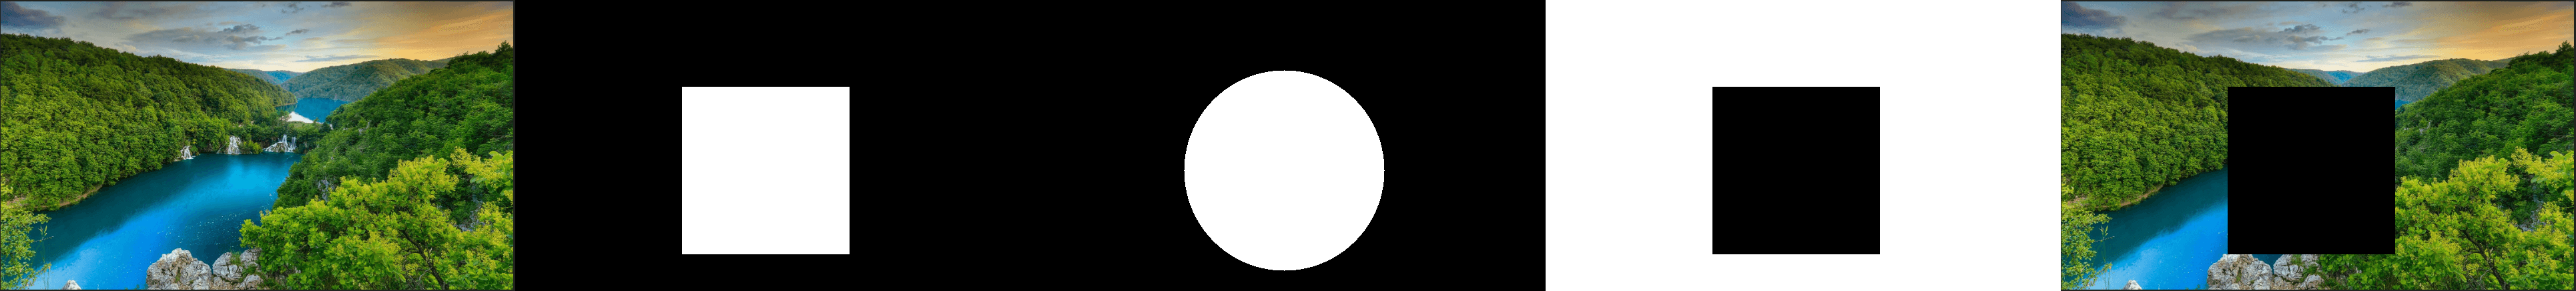

In [ ]:
original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/jungle.png')

# creating a square of zeros using a variable
mask1 = np.zeros(original.shape, dtype=np.uint8)
cv.rectangle(mask1, (250, 130), (500, 380), (255, 255, 255), -1)

# creating a circle of zeros using a variable
mask2 = np.zeros(original.shape, dtype=np.uint8)
cv.circle(mask2, (380, 255), 150, (255, 255, 255), -1)

final_frame_mask = cv.hconcat((mask1, mask2))

bitwiseNot = cv.bitwise_not(mask1, mask2)

result = cv.bitwise_and(original, bitwiseNot)

final_frame = cv.hconcat((original, final_frame_mask, bitwiseNot, result))
cv2_imshow(final_frame)


3. Operator NAND
> Operator NAND atau disebut juga dengan not-and adalah operator logika yang menghasilkan nilai false apabila kedua operand memiliki nilai true.

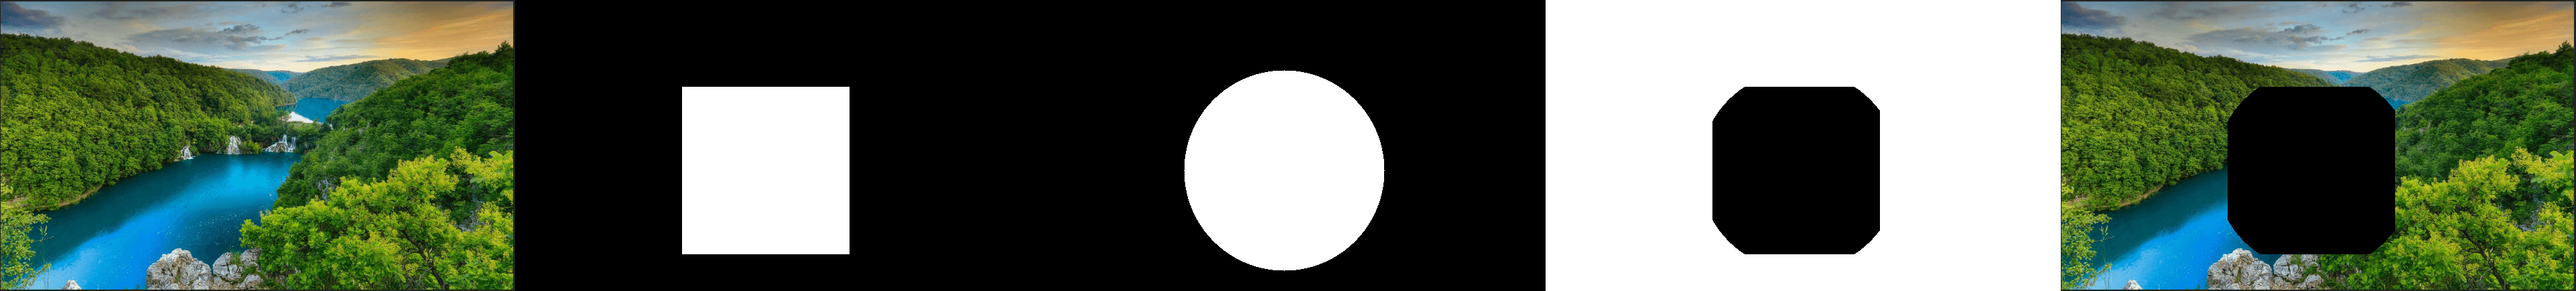

In [ ]:
original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/jungle.png')

# creating a square of zeros using a variable
mask1 = np.zeros(original.shape, dtype=np.uint8)
cv.rectangle(mask1, (250, 130), (500, 380), (255, 255, 255), -1)

# creating a circle of zeros using a variable
mask2 = np.zeros(original.shape, dtype=np.uint8)
cv.circle(mask2, (380, 255), 150, (255, 255, 255), -1)

final_frame_mask = cv.hconcat((mask1, mask2))

bitwiseNand = cv.bitwise_not(cv.bitwise_and(mask1, mask2))

result = cv.bitwise_and(original, bitwiseNand)

final_frame = cv.hconcat((original, final_frame_mask, bitwiseNand, result))
cv2_imshow(final_frame)


4. Operator XOR


> Operator XOR (atau disebut juga dengan exclusive or) adalah operator logika yang menghasilkan nilai true apabila kedua operand memiliki nilai yang berbeda, dan false apabila kedua operand memiliki nilai yang sama.



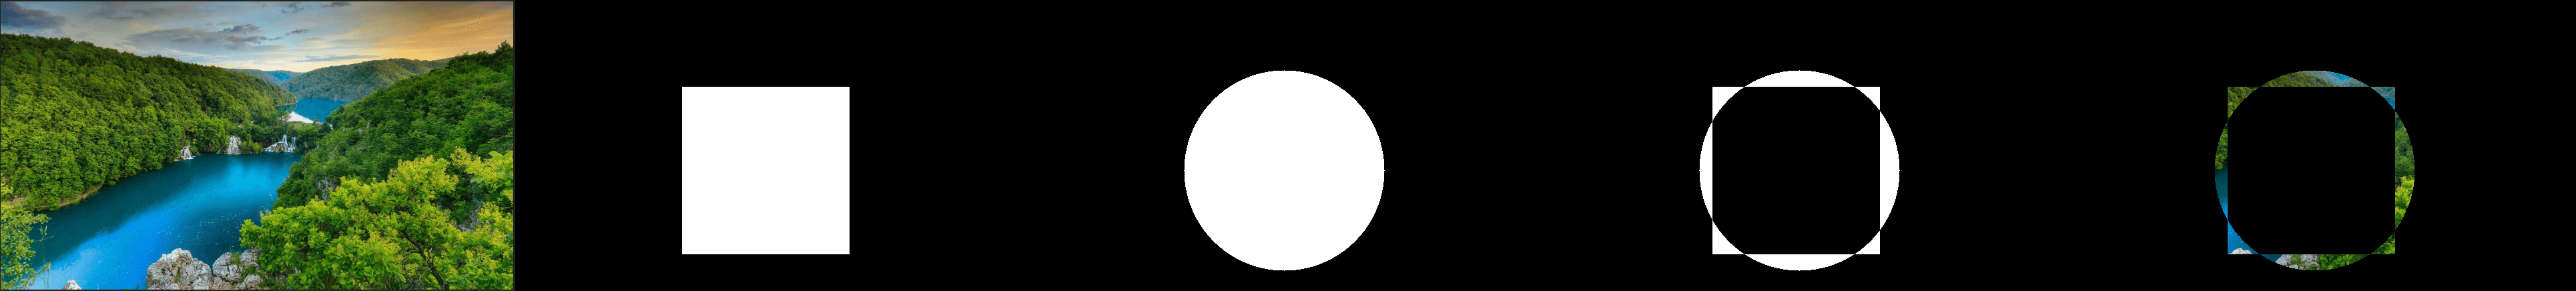

In [ ]:
original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/jungle.png')

# creating a square of zeros using a variable
mask1 = np.zeros(original.shape, dtype=np.uint8)
cv.rectangle(mask1, (250, 130), (500, 380), (255, 255, 255), -1)

# creating a circle of zeros using a variable
mask2 = np.zeros(original.shape, dtype=np.uint8)
cv.circle(mask2, (380, 255), 150, (255, 255, 255), -1)

final_frame_mask = cv.hconcat((mask1, mask2))

bitwiseXor = cv.bitwise_xor(mask1, mask2)

result = cv.bitwise_and(original, bitwiseXor)

final_frame = cv.hconcat((original, final_frame_mask, bitwiseXor, result))
cv2_imshow(final_frame)